In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
ds = xr.open_dataset('../../data/sst.mnmean.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2016, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-01-07

In [3]:
Twinter=ds['sst'].loc[ds.time.dt.month.isin([12,1,2])].loc['2019-03-01':'2020-03-01']
Twinter

<xarray.DataArray 'sst' (time: 3, lat: 89, lon: 180)>
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2019-12-01 2020-01-01 2020-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [4]:
Twinterave=Twinter.mean(dim='time')
Twinterave

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [5]:
lat=Twinterave['lat']
lon=Twinterave['lon']

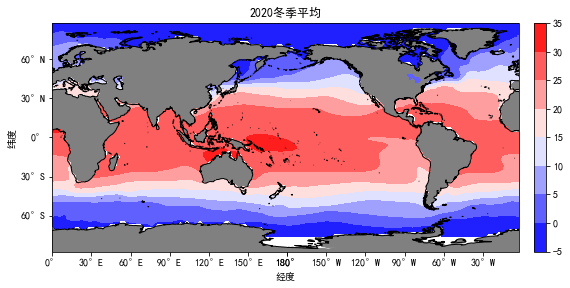

In [6]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
# 添加海岸线和陆地
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAND,facecolor='grey')
# 添加坐标轴
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter(auto_hide=False)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置刻度大小
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_title('2020冬季平均')

# 绘图
colorbar = ax.contourf(lon,lat,Twinterave,cmap='bwr',transform=ccrs.PlateCarree())
plt.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.04, shrink=0.7)

# 保存图片
plt.savefig('../../picture/pythonhome/11/qu1.png')

In [7]:
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2016, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-01-07

In [8]:
# 计算ENSO指数：计算5°s-5°N，170°E-120°W内的区域平均
ENSOall=ds['sst'].loc[:,5:-5,170:240].mean(dim=['lat','lon'],skipna=True)
ENSOall[:]

<xarray.DataArray 'sst' (time: 2016)>
array([26.628162, 26.805593, 27.393145, ..., 26.507677, 26.467287,
       26.28458 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

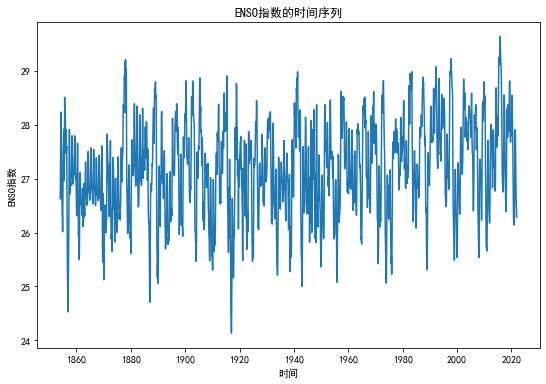

In [9]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
ax.plot(ds['time'],ENSOall)
ax.set_xlabel('时间')
ax.set_ylabel('ENSO指数')
ax.set_title('ENSO指数的时间序列')

# 保存图片
plt.savefig('../../picture/pythonhome/11/qu2.png')

In [10]:
# 分别计算四个季节的ENSO指数
ENSOseason=ds['sst'].groupby(ds.time.dt.season).mean(dim='time').loc[:,5:-5,170:240].mean(dim=['lat','lon'],skipna=True)
ENSOseason

<xarray.DataArray 'sst' (season: 4)>
array([26.853836, 27.336132, 27.57059 , 26.920237], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

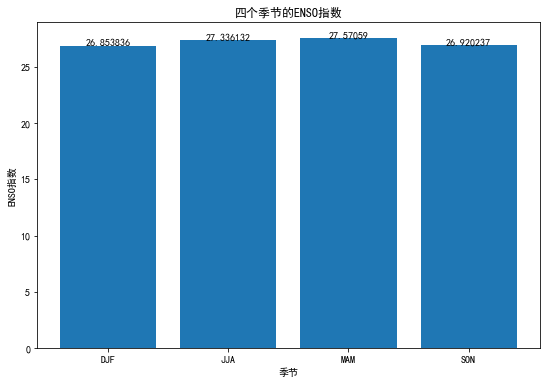

In [11]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
ax.bar(ENSOseason.season,ENSOseason)
ax.set_xlabel('季节')
ax.set_ylabel('ENSO指数')
ax.set_title('四个季节的ENSO指数')
for i,j in zip(ENSOseason.season,ENSOseason):
    ax.text(i,j.data,j.data,ha='center')
# 保存图片
plt.savefig('../../picture/pythonhome/11/qu3.png')

In [12]:
# 以sst>=|0.5K|为标准在过去的几十年中，El Nino和La Nina年分别是哪一年
sstave=ds['sst'].mean(dim='time')
sstave

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7998481, -1.7998575, -1.7998646, ..., -1.7998819, -1.7998582,
        -1.7998413],
       [-1.799857 , -1.7998397, -1.7998296, ..., -1.7999817, -1.7999095,
        -1.7998827],
       [-1.8000275, -1.7999699, -1.799932 , ..., -1.7999892, -1.8000056,
        -1.8000206],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [13]:
sst=ds['sst']
sstjuping=sst-sstave
sstjuping=sstjuping.loc[:,5:-5,170:240].mean(dim=['lat','lon'],skipna=True)

In [14]:
sstjupingyear=sstjuping.groupby(ds.time.dt.year).mean(dim='time')
sstjupingyear

<xarray.DataArray 'sst' (year: 168)>
array([-1.40653953e-01,  4.87480968e-01, -6.23890936e-01, -4.83190417e-01,
        4.17013168e-02,  1.50252998e-01, -5.00853956e-01, -6.62602246e-01,
       -7.07495272e-01, -4.12166804e-01, -2.49069333e-01, -2.01878443e-01,
       -2.34592915e-01, -3.13609689e-01, -3.01778138e-01, -6.39013886e-01,
       -1.11411071e+00, -7.20369443e-02, -6.08065069e-01, -4.95855570e-01,
       -8.03466558e-01, -4.54411119e-01, -2.06947908e-01,  1.28599513e+00,
        3.73949796e-01, -6.97857320e-01, -1.80703029e-01,  3.47662657e-01,
        4.95432615e-02,  1.56045675e-01,  3.83874148e-01,  4.60983485e-01,
       -7.20521629e-01, -6.87182009e-01,  9.62221622e-01, -1.49115771e-01,
       -8.32944453e-01,  1.84251472e-01, -6.24197066e-01, -8.97549331e-01,
       -7.57278383e-01,  2.96495501e-02,  7.23204315e-01,  7.29838163e-02,
       -6.19621634e-01,  1.46074206e-01,  7.66681194e-01, -7.04058483e-02,
        9.32459414e-01, -1.09402329e-01, -2.89954156e-01,  1.02232015e+00,
       -2.44541809e-01, -2.28455707e-01, -6.34278178e-01, -9.70488310e-01,
       -1.22957408e+00, -4.66181487e-02,  2.01159611e-01,  5.85187487e-02,
        8.64716768e-01,  1.27281681e-01, -1.16874361e+00, -1.62735987e+00,
        2.56642669e-01,  4.09611873e-02,  1.30723223e-01, -3.50851178e-01,
       -5.88284791e-01,  1.03943594e-01, -5.43530226e-01, -1.21613331e-01,
        1.69354960e-01, -3.43481511e-01, -1.19386315e-01, -1.06473602e-01,
        6.54129565e-01,  1.53577402e-01, -1.92218304e-01, -1.02878451e+00,
...
       -2.59864181e-01, -6.03492968e-02, -3.33136946e-01, -6.46923840e-01,
       -9.30826366e-01,  3.10254306e-01,  6.04853146e-02,  5.20893991e-01,
       -4.64901775e-01, -9.60256815e-01, -5.76773465e-01,  6.86619818e-01,
        7.71719456e-01,  1.30944028e-01, -6.04464859e-03, -1.18991770e-01,
       -2.77182490e-01,  4.44589943e-01, -4.98486280e-01,  6.43321931e-01,
        4.89155799e-01, -1.42978981e-01,  2.03588545e-01,  8.79540145e-01,
       -1.87758878e-01, -8.12928677e-01,  9.21023607e-01, -4.27318007e-01,
       -7.41441250e-01, -9.19674814e-01,  7.87196041e-04,  6.12817407e-01,
        1.04536958e-01,  4.29593891e-01,  5.07836640e-01,  2.50316877e-02,
        1.09975064e+00,  5.93819439e-01, -2.50706762e-01, -2.75314093e-01,
        5.07272720e-01,  1.34236205e+00, -4.35387850e-01, -3.55791479e-01,
        6.57809436e-01,  1.05454946e+00,  9.83889043e-01,  7.39307225e-01,
        9.00747776e-01,  3.64455670e-01, -1.86877716e-02,  1.34147644e+00,
        1.90968081e-01, -8.19023609e-01, -5.01894593e-01,  1.53275684e-01,
        1.06604731e+00,  7.26032317e-01,  9.05836046e-01,  5.57816863e-01,
        5.61270714e-01, -4.37295437e-02, -4.28584427e-01,  7.04362333e-01,
       -2.89664567e-02, -4.24968630e-01,  2.54339427e-01,  1.89383879e-01,
        6.60365343e-01,  1.76681244e+00,  7.95782983e-01,  2.98827380e-01,
        5.83322048e-01,  1.02019441e+00,  2.03363433e-01, -2.34631822e-01],
      dtype=float32)
Coordinates:
  * year     (year) int64 1854 1855 1856 1857 1858 ... 2017 2018 2019 2020 2021

In [15]:
ElNino=[]
LaNina=[]
for i in sstjupingyear.year:
    if sstjupingyear.loc[i] >=0.5:
        ElNino.append(int(i.data))
    if sstjupingyear.loc[i] <=-0.5:
        LaNina.append(int(i.data))

In [16]:
ElNino

[1877,
 1888,
 1896,
 1900,
 1902,
 1905,
 1914,
 1930,
 1940,
 1941,
 1953,
 1957,
 1958,
 1965,
 1969,
 1972,
 1977,
 1980,
 1982,
 1983,
 1986,
 1987,
 1990,
 1991,
 1992,
 1993,
 1994,
 1997,
 2002,
 2003,
 2004,
 2005,
 2006,
 2009,
 2014,
 2015,
 2016,
 2018,
 2019]

In [17]:
LaNina

[1856,
 1860,
 1861,
 1862,
 1869,
 1870,
 1872,
 1874,
 1879,
 1886,
 1887,
 1890,
 1892,
 1893,
 1894,
 1898,
 1908,
 1909,
 1910,
 1916,
 1917,
 1922,
 1924,
 1933,
 1934,
 1938,
 1943,
 1949,
 1950,
 1955,
 1956,
 1971,
 1974,
 1975,
 1999,
 2000]

In [18]:
len(LaNina)+len(ElNino)

75